In [2]:
import sys

if "/Users/shvimas/GitHub/diploma/src" not in sys.path:
    sys.path.append("/Users/shvimas/GitHub/diploma/src")

In [3]:
%matplotlib inline
import matplotlib.pyplot as pl
import data_helpers as dh
import heston_pricing as he
from pars_range import Range
from importlib import reload


pl.rcParams["figure.figsize"] = (15, 9)

In [4]:
pl.rcParams["figure.figsize"] = (15, 9)

In [5]:
try:
    data, info = dh.read_data("../SPH2_031612.csv")
except FileNotFoundError:
    data, info = dh.read_data("SPH2_031612.csv")

In [6]:
data, info = dh.prepare_data(data=data, info=info)

In [7]:
num = 20
kappa_range = Range(min=2, max=10, num=num)
theta_range = Range(min=1e-6, max=1, num=num)
sigma_range = Range(min=1e-6, max=1, num=num)
rho_range = Range(min=0, max=1, num=num)
v0_range = Range(min=1e-6, max=1, num=num)

In [8]:
day = 0
rate = .03
q = rate
maturity = info[day].mat / len(info)
spot = info[day].spot
is_call = True
strikes = data.strikes[is_call][day]
prices = data.prices[is_call][day]
    
strikes = strikes[:-10]
prices = prices[:-10]

args = (spot, strikes, maturity, rate, q, is_call)

In [9]:
pars = (4.2216740989, 0.0199176675743, 1.51769128617e-05, 0.0474806534178, 0.000569295223402)

kappa_range[0], *pars[1:]


(2.0, 0.0199176675743, 1.51769128617e-05, 0.0474806534178, 0.000569295223402)

In [11]:
predicted_kappa = []
kappas = kappa_range
for kappa in kappas:
    pars = kappa, *(pars[1:])
    x = strikes
    y = he.price_heston(pars=pars, args=args)
    predicted_kappa.append(x)
    predicted_kappa.append(y)

kappas[:]

[2.0,
 2.4210526315789473,
 2.8421052631578947,
 3.263157894736842,
 3.6842105263157894,
 4.105263157894736,
 4.526315789473684,
 4.947368421052632,
 5.368421052631579,
 5.789473684210526,
 6.2105263157894735,
 6.631578947368421,
 7.052631578947368,
 7.473684210526315,
 7.894736842105263,
 8.31578947368421,
 8.736842105263158,
 9.157894736842104,
 9.578947368421051,
 10.0]

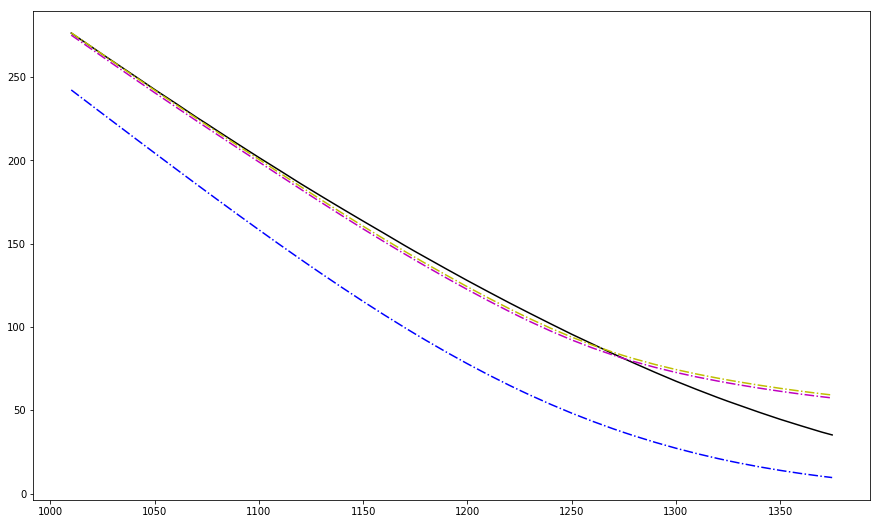

In [16]:
p = pl.plot(  # *predicted_kappa, 
    strikes, data.prices[is_call][day][:-10], "k-",
    strikes, he.price_heston(args=args, pars=(5.10944827e+00, 5.93251547e-03, 2.81152494e-05,
                                              4.93769921e-02, 1.01083722e-03)), "b-.",
    strikes, he.price_heston(args=args, pars=(0.07113125,  0.11028212,  2.0111178,  
                                              0, 0.09534668)), "m-.",
    strikes, he.price_heston(args=args, pars=(0.03004374455815602, 0.02711322443113005, 1.9746283135615887, 
                                              0.00019123809579942708, 0.10315832344591712)), "y-.")

In [11]:
from importlib import reload
import heston_pricing as he
from structs import EvalArgs
import modeling
modeling = reload(modeling)
he = reload(he)

In [18]:
res = modeling.tune_model(args=EvalArgs.from_tuple(args),
                          model="heston", metric="MAR", prices=prices, 
                          bounds=((.01, 6), (.0001, 1), (1.5e-7, 3), (0, 1), (5e-6, 1)))


In [19]:
res

     fun: 1.0884918034416657
     jac: array([ 0.00170992,  0.07555159, -0.00034515,  0.13998096,  0.06375647])
 message: 'Optimization terminated successfully.'
    nfev: 2175
     nit: 24
 success: True
       x: array([ 0.8394815 ,  0.03088356,  2.57097933,  0.        ,  0.11774668])

In [23]:
from optimization import mean_absolute_error
predicted = he.price_heston(pars=(2.76000138e-01, 1.00000000e-04, 8.19074054e-01, 1.00000000e+00, 1.00000000e-01),
                            args=args)
mean_absolute_error(predicted, prices)
predicted.flatten().shape


(45,)

In [10]:
res = modeling.tune_model(args=EvalArgs.from_tuple(args),
                          model="heston", metric="MAE", prices=prices, 
                          bounds=((.1, 6), (.0001, .03), (1.5e-7, 3), (0, 1), (5e-6, 1e-1)))


In [11]:
res

     fun: 4.986386452082709
     jac: array([  0.75808275,  -0.03873213,  -0.02673097,  10.08315769,   1.26953514])
 message: 'Optimization terminated successfully.'
    nfev: 4179
     nit: 50
 success: True
       x: array([ 0.10620628,  0.02527766,  1.80945962,  0.        ,  0.09975204])

In [52]:
%reload_ext autoreload

In [ ]:
%autoreload

In [14]:
import warnings
warnings.filterwarnings("ignore", message='numpy.dtype size changed')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
warnings.filterwarnings('ignore', message="can't resolve package from __spec__ or __package__, ")

In [19]:
import data_helpers as dh
import numpy as np
import sklearn.decomposition as de


dh = reload(dh)


filename1 = dh.get_filename(model='heston', metric='RMR', best=True, from_dir='params/params', is_call=is_call)
filename2 = dh.get_filename(model='heston', metric='RMR', best=True, from_dir='params', is_call=is_call)
centers1 = np.array(list(dh.extract_centers(filename1)))
centers2 = np.array(list(dh.extract_centers(filename2)))
pca1 = de.PCA(n_components=1, whiten=True).fit(centers1)
print(pca1.explained_variance_ratio_)
components1 = pca1.components_
pca2 = de.PCA(n_components=1, whiten=True).fit(centers2)
print(pca2.explained_variance_ratio_)
components2 = pca2.components_

[ 0.9646794]
[ 0.99225111]


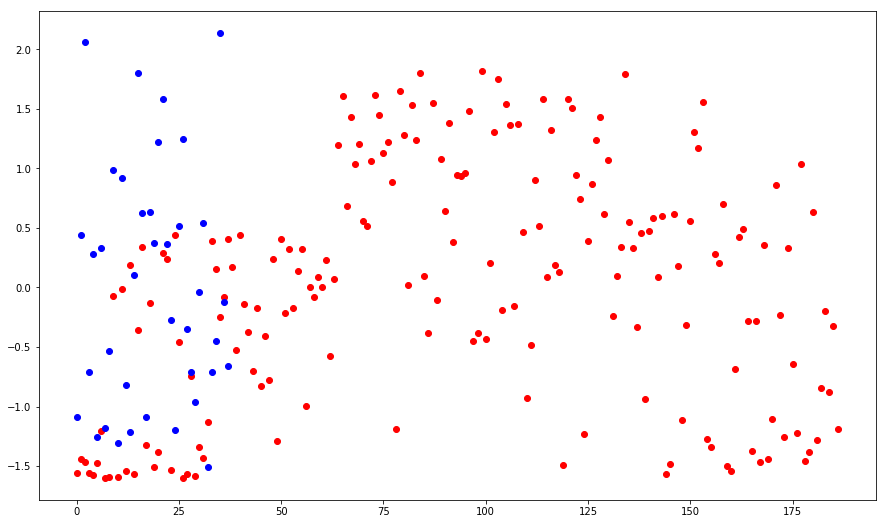

In [20]:
centers_2d_1 = pca1.fit_transform(centers1)
centers_2d_2 = pca2.fit_transform(centers2)
dh.plot_dots(a=centers_2d_1, b=centers_2d_2, dim=1)

In [21]:
print(components1)
print(components2)

[[ 0.99851672 -0.01124467 -0.01281485 -0.05136224  0.00596736]]
[[ -9.99776973e-01   5.78548791e-05  -5.32028701e-03  -1.99825631e-02
   -4.28875419e-03]]


In [23]:
np.mean(centers1) + centers_2d_1 @ components1 - centers1

array([[ -6.06339686e-01,   1.07192450e+00,   8.70341998e-01,
          1.34612793e-01,   1.04383742e+00],
       [ -8.56938407e-01,   1.06798090e+00,   8.74638248e-02,
          1.28182510e-01,   1.04578011e+00],
       [ -7.99706330e-01,   1.06549637e+00,   5.39689839e-01,
          1.29558304e-01,   1.04562027e+00],
       [ -6.26227312e-01,   1.07003947e+00,   3.53966991e-01,
          1.49706104e-01,   1.04307867e+00],
       [ -5.94794211e-01,   1.06176290e+00,   2.17920485e-01,
          1.35148130e-01,   1.04196308e+00],
       [ -7.86024313e-01,   1.07090551e+00,   4.33927663e-01,
          1.29958355e-01,   1.04288527e+00],
       [ -1.30168516e+00,   1.06617542e+00,   4.89772947e-01,
          1.16153735e-01,   1.04717763e+00],
       [ -5.39630338e-01,   1.06887834e+00,   9.83662330e-01,
          1.36358554e-01,   1.04431595e+00],
       [ -5.54080196e-01,   1.07222051e+00,   1.00199781e+00,
          1.35964889e-01,   1.04424585e+00],
       [ -3.47507515e+00,   1.0551319